# CS559: Homework #2
Assignment #2: Due on 3/12/2021 by 11:59 PM

- Change the file name as YourName_S21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

## Problem 1 - Clustering Using KMeans [35 pts]

The tasks in this problem are:
- impletemenation of KMeans
- confirmation of pre-determined K value

Here, we have a given data set `HW2_Q1_0.csv` containing coordinates of x and y. 

1-a. Load the data and add feature name as X and Y for the first and second columns, respectively. (2 pts)

In [1]:
import pandas as pd
import numpy as np
data_read=pd.read_csv('HW2_Q2_0.csv',names=['X','Y'])
data = pd.DataFrame(data_read)
data.head()

,X,Y
0,-0.452720,-0.018213
1,-0.169793,1.073745
2,1.128729,-2.395042
3,0.122506,-0.973069
4,-0.409200,0.129649


1-b. Using `KMeans` from `sklearn.cluster`, determine the appropriate $K$ value for `HW2_Q1_0.csv` and report it. Explain why your pre-determined $K$ value is appropriate. The function `plot_inertia` is provided to you. (4 pts)

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(10)

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result


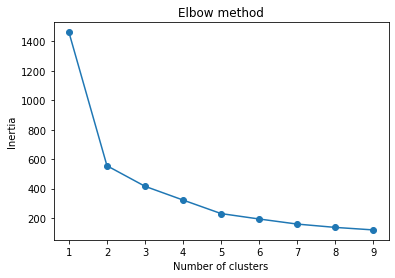

In [3]:
data_plot = plot_inertia(kmeans,data, range(1, 10))

 Explain why your pre-determined  𝐾  value is appropriate
 The effect evaluation method of kmeans clustering is SSE, which is to calculate the average distance from all points to the corresponding cluster center. Of course, the larger the K value is, the smaller the SSE is. We need to find out the change rule of SSE with the change of K value, and find the K value with the smallest reduction of SSE. At this time, K should be a relatively reasonable value. So point 5 is more in line with this feature

1-c. Make a scatter plot of y vs. x. Do you think your pre-determined $K$ value is acceptable. Explain why. If you do not think your pre-determined $K$ value is not correct, explain what a new pre-determined $K$ value must be. (4 pts) 

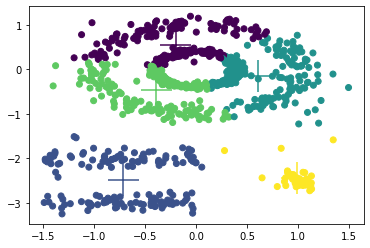

In [4]:
kmeans.set_params(n_clusters=5)
kmeans.fit(data)
plt.scatter(data.values[:,0],data.values[:,1],c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = "+", s=1000, c=[1, 2, 3, 4, 5])
plt.show()

Do you think your pre-determined  𝐾  value is acceptable.
I think there is still room for improvement. There is a cluster with a large number of points, and it shows a trend that it can be subdivided again. This conjecture has been verified by setting the K value to 6, so I change the K value to 6

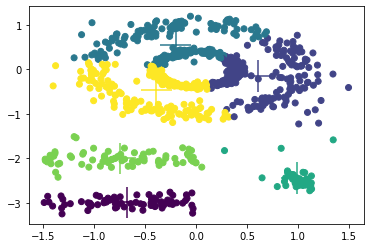

In [5]:
kmeans.set_params(n_clusters=6)
kmeans.fit(data)
plt.scatter(data.values[:,0],data.values[:,1],c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = "+", s=1000, c=[1, 2, 3, 4, 5, 6])
plt.show()

1-d. Impletement `MY_KMean` that does the KMeans clustering. When you do the implementation, you may use linear algebra built-in functions from `Numpy`. Do not use `KMeans` directly. (10 pts)

Type Markdown and LaTeX:  𝛼2

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np

class MY_KMean():

    def __init__(self, k=2):
        self.__k = k
        self.__data = None         
        self.__pointCenter = None  
        self.__pointCenterd={}
        self.__result = []       
        self.__labels=[]
        for i in range(k):
            self.__result.append([])  
            pass
        pass
        

    def fit(self, data, threshold=0.0001,times=50000):
        self.__data = data    
        self.randomCenter()  
        centerDistance = self.calPointCenterDistance(self.__pointCenter, self.__data)  
        i = 0
        for temp in centerDistance:
            index = np.argmin(temp)  
            self.__result[index].append(self.__data[i])  
            i += 1
            pass
        
        oldCenterPoint = self.__pointCenter
        newCenterPoint = self.calNewPointCenter(self.__result)

        while np.sum(np.sum((oldCenterPoint -  newCenterPoint)**2, axis=1)**0.5)/self.__k > threshold:
            times -= 1
            result = []
            
            for i in range(self.__k):
                result.append([])
                pass
            
            oldCenterPoint = newCenterPoint
            centerDistance = self.calPointCenterDistance(newCenterPoint, self.__data)

            i = 0
            for temp in centerDistance:
                index = np.argmin(temp)
                result[index].append(self.__data[i]) 
                i += 1
                pass

            newCenterPoint = self.calNewPointCenter(result)

            self.__result = result
            pass
        self.__pointCenter = newCenterPoint
        
        for h in range(self.__k):
            self.__pointCenterd[h] = self.__pointCenter[h]
            pass
            
        for j in range(len(self.__data)):
            distances = [np.linalg.norm(self.__data[j] - self.__pointCenterd[center]) for center in self.__pointCenterd]
            index = distances.index(min(distances))
            self.__labels.append(index)
            pass
        
        #print(self.__pointCenterd)
        return self.__pointCenter, self.__result, self.__labels, self.__pointCenterd
        pass
    
    def calPointCenterDistance(self, center, data):
        centerDistance = []
        flag = False
        for temp in data:
            centerDistance.append([np.sum((center - temp) ** 2, axis=1) ** 0.5])
            pass
        return np.array(centerDistance)
        pass

    def calNewPointCenter(self, result):
        newCenterPoint = None
        flag = False
        for temp in result:
            temps = np.array(temp)  
            point = np.mean(temps, axis=0)   
            if not flag:
                newCenterPoint = np.array([point])
                flag = True
                pass
            else:
                newCenterPoint = np.vstack((newCenterPoint, point))  
            pass
        
        return newCenterPoint
        pass

    def randomCenter(self):
        if not self.__pointCenter:
            index = random.randint(0, len(self.__data) - 1)  
            self.__pointCenter = np.array([self.__data[index]])  
            pass

        while len(self.__pointCenter) < self.__k:
            
            index = random.randint(0, len(self.__data) - 1)
            
            if self.__data[index] not in self.__pointCenter:
                self.__pointCenter = np.vstack((self.__pointCenter, self.__data[index]))
                pass
            pass
        pass
    pass


1-e. Using `MY_KMeans` with the pre-determined $K$ value from 1-c, do the clustering.  After the clustering, find the centroid of each cluster id and report. (4 pts)

In [7]:
mykmean = MY_KMean(k=6)
datanp = np.array(data_read)
pointCenter,result,labels,pointCenterd = mykmean.fit(datanp,0.0001)
print(pointCenter)

[[ 0.98254447 -2.44694527]
 [-0.3891968  -0.45659497]
 [-0.20269612  0.55537393]
 [-0.67655179 -2.98770155]
 [-0.74671492 -2.00321222]
 [ 0.60365071 -0.14675637]]


1-f. Add the cluter label to the dataframe and call it `Class`. Make a plot and indicate the centroids. (2 pts)

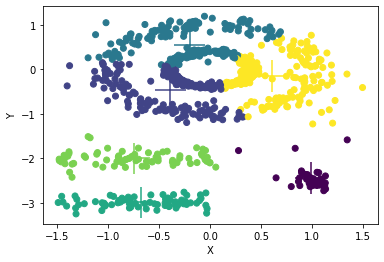

In [30]:
data['Class'] = labels
data.head()
temp_x = []
temp_y = []
for i in pointCenterd.values():
    temp_x.append(i[0])
    temp_y.append(i[1])
plt.scatter(data.values[:, 0], data.values[:, 1], c = labels)
plt.scatter(temp_x, temp_y, marker = "+", s=1000, c=[1, 2, 3, 4, 5, 6])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

1-g. Load a given data set `HW2_Q1_1.csv`. Here you have true cluter ids. (4 pts)
- Make a box plot by the ids and make a discrete statistical analysis. Here, you also have to make a box plot with your result from 1-f and compare. 
- Is your pre-determined $K$ value the same as the true $K$ value? Explain. 
- If not, do the clustering again using `MY_KMeans` with the true $K$ value. 

HW2_Q1_1.csv


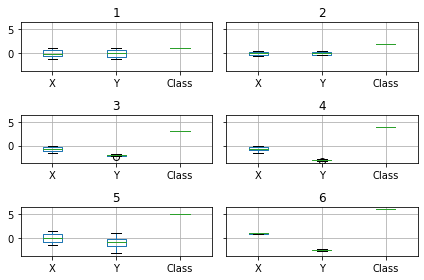

MY_KMeans


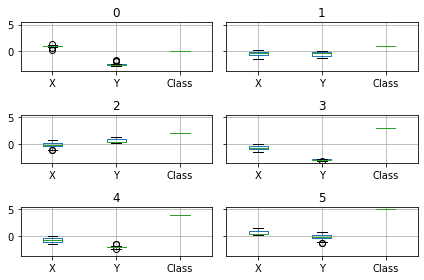

In [33]:
print('HW2_Q1_1.csv')
data_label = pd.DataFrame(pd.read_csv('HW2_Q2_1.csv',header = None, names = ['X', 'Y', 'Class']))
data_lable_class = data_label.groupby('Class')
data_lable_class.boxplot()
plt.tight_layout()
plt.show()

print('MY_KMeans')
data_class = data.groupby('Class')
data_class.boxplot()
plt.tight_layout()
plt.show()

Is your pre-determined  𝐾  value the same as the true  𝐾  value? 
The K value of both are 6, and the box plot is almost the same.

1-h. Evalaute your result. (5 pts)

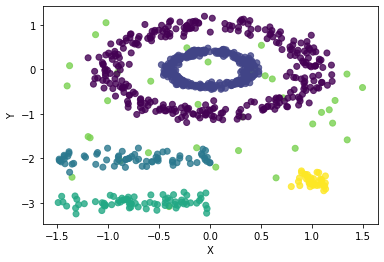

In [10]:
plt.scatter(data_label.values[:, 0], data_label.values[:, 1], c = data_label.values[:, 2], alpha=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In general, my mykemeans prediction is the same as sklearn's kmeans, but there are other factors that lead to the deviation between the results and the results in the true label graph. For example, different processing of some bad data, selection of initial points may produce different clustering results or different processing of noise. And because my kmeans uses randomly generated center points, the final result may be different from klearn's kmeans.

## Problem 2 - Clustering Using Hierarchal Clustering [10 pts]

In this problem, you will make a dendrogram using Hierarchal clustering method and compare with the result you obtained from Problem #1. 

2-a. Do the hierarchal clustering with various distances and linkages. [8 pts]

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_read=pd.read_csv('HW2_Q2_0.csv',names=['X','Y'])
data = pd.DataFrame(data_read)

completec = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity = 'cosine').fit(data)
completee = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity = 'euclidean').fit(data)
completem = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity = 'manhattan').fit(data)

averagec = AgglomerativeClustering(n_clusters=6, linkage='average', affinity = 'cosine').fit(data)
averagee = AgglomerativeClustering(n_clusters=6, linkage='average', affinity = 'euclidean').fit(data)
averagem = AgglomerativeClustering(n_clusters=6, linkage='average', affinity = 'manhattan').fit(data)

singlec = AgglomerativeClustering(n_clusters=6, linkage='single', affinity = 'cosine').fit(data)
singlee = AgglomerativeClustering(n_clusters=6, linkage='single', affinity = 'euclidean').fit(data)
singlem = AgglomerativeClustering(n_clusters=6, linkage='single', affinity = 'manhattan').fit(data)

warde = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity = 'euclidean').fit(data)

2-b. Which distance and linkage provide the best and worst result? You can make numerical and/or graphical comparisons. For example, you can count the number of cluster IDs that are correctly clustered from the true labels and find its ratio. [2 pts]

linkage='complete', affinity = 'cosine'


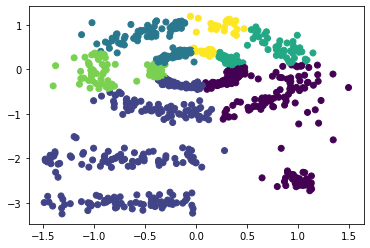

linkage='complete', affinity = 'euclidean'


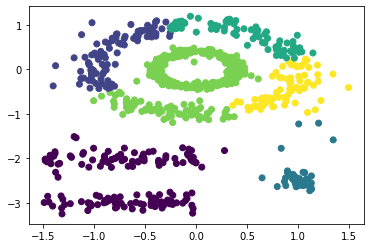

linkage='complete', affinity = 'manhattan'


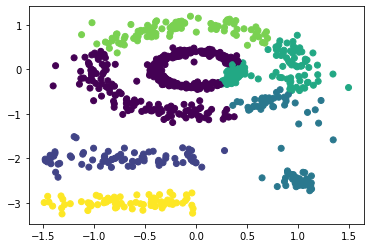

linkage='average', affinity = 'cosine'


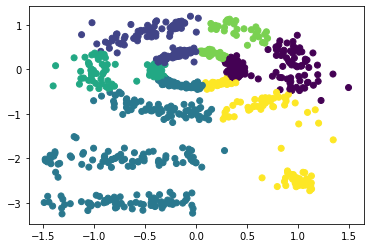

linkage='average', affinity = 'euclidean'


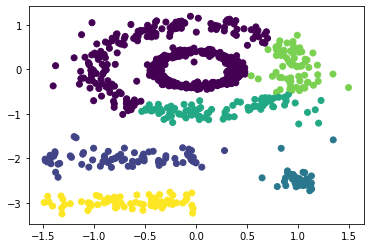

linkage='average', affinity = 'manhattan'


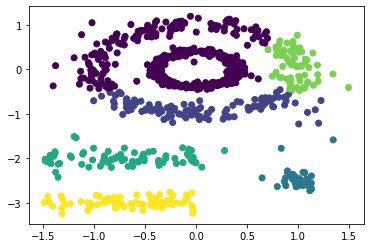

linkage='single', affinity = 'cosine'


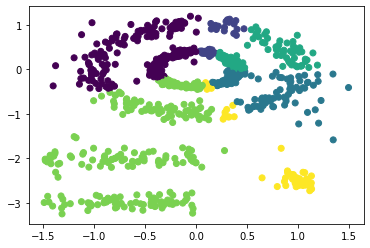

linkage='single', affinity = 'euclidean'


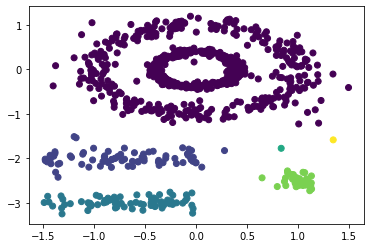

linkage='single', affinity = 'manhattan'


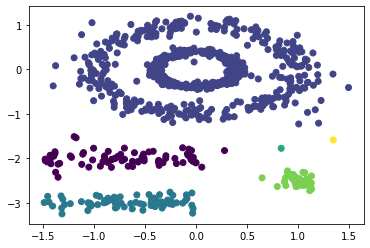

linkage='ward', affinity = 'euclidean'


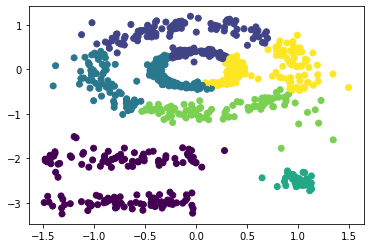

In [12]:
print("linkage='complete', affinity = 'cosine'")
plt.scatter(data.values[:,0],data.values[:,1],c = completec.labels_)
plt.show()
print("linkage='complete', affinity = 'euclidean'")
plt.scatter(data.values[:,0],data.values[:,1],c = completee.labels_)
plt.show()
print("linkage='complete', affinity = 'manhattan'")
plt.scatter(data.values[:,0],data.values[:,1],c = completem.labels_)
plt.show()
print("linkage='average', affinity = 'cosine'")
plt.scatter(data.values[:,0],data.values[:,1],c = averagec.labels_)
plt.show()
print("linkage='average', affinity = 'euclidean'")
plt.scatter(data.values[:,0],data.values[:,1],c = averagee.labels_)
plt.show()
print("linkage='average', affinity = 'manhattan'")
plt.scatter(data.values[:,0],data.values[:,1],c = averagem.labels_)
plt.show()
print("linkage='single', affinity = 'cosine'")
plt.scatter(data.values[:,0],data.values[:,1],c = singlec.labels_)
plt.show()
print("linkage='single', affinity = 'euclidean'")
plt.scatter(data.values[:,0],data.values[:,1],c = singlee.labels_)
plt.show()
print("linkage='single', affinity = 'manhattan'")
plt.scatter(data.values[:,0],data.values[:,1],c = singlem.labels_)
plt.show()
print("linkage='ward', affinity = 'euclidean'")
plt.scatter(data.values[:,0],data.values[:,1],c = warde.labels_)
plt.show()

Which distance and linkage provide the best and worst result?
 when linkage='single', affinity = 'euclidean', it has the best result and when linkage='average', affinity = 'cosine', it has the worst result

## Problem 3 - Principal Component Analysis [15 pts]

3-a. Run the following codes. 

In [13]:
import numpy as np

np.random.seed(2342)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 30).T
assert class1_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 30).T
assert class2_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

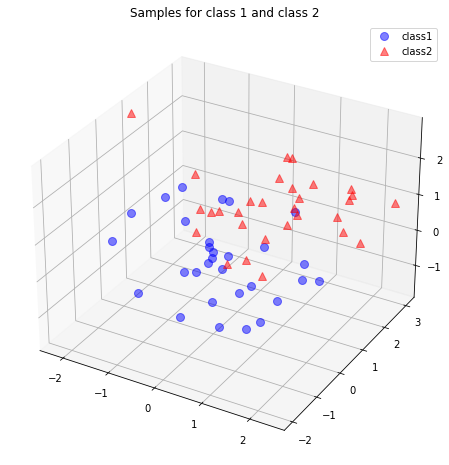

In [14]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

3-b. PCA Implementation. Here, the descriiption of each step and part of codes. You have to fill out the rest process. [10 pts]

    1. Take the dataset w/o classes. 

In [15]:
a=np.array(class1_sample)
b=np.array(class2_sample)
sample = np.append(a,b,axis=1)
assert sample.shape == (3,60), "The matrix has not the dimensions 3x60"

    2. Compute the d-dimentional mean vector.

In [16]:
mean_x = np.mean(sample[0, :])
mean_y = np.mean(sample[1, :])
mean_z = np.mean(sample[2, :])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.47343911]
 [0.52653958]
 [0.73360656]]


    3. Compute the scatter matrix as following. 
$$\textbf{S}=\sum_{k=1}^N (\textbf{x}_k-\bar{\textbf{x}})(\textbf{x}_k-\bar{\textbf{x}})^T$$ 
    where $\bar{\textbf{x}}$ is the mean vector.

In [17]:
scatter_matrix = np.zeros((3,3))
for i in range(sample.shape[1]):
    x = sample[0, i] - mean_x
    y = sample[1, i] - mean_y
    z = sample[2, i] - mean_z
    c1 =[x,y,z]
    c2 =  np.transpose([x,y,z])
    scatter_matrix += np.dot(c1,c2)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[213.14728084 213.14728084 213.14728084]
 [213.14728084 213.14728084 213.14728084]
 [213.14728084 213.14728084 213.14728084]]


    Then compute the covariance matrix using `np.cov()` function.

In [18]:
cov_mat = np.cov(sample)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.12432002  0.27043376  0.15901633]
 [ 0.27043376  1.23833166 -0.01238244]
 [ 0.15901633 -0.01238244  1.25001409]]


    4. Compute eigenvectors and corresponding eigenvalues using np.linalg.eig(). 

In [19]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(60 * '-')

Eigenvector 1: 
[[-0.57735027]
 [-0.57735027]
 [-0.57735027]]
Eigenvalue 1 from scatter matrix: 639.4418425198182
Eigenvalue 1 from covariance matrix: 0.8592333131868222
Scaling factor:  744.2004781543952
------------------------------------------------------------
Eigenvector 2: 
[[-0.81617636]
 [ 0.42788995]
 [ 0.38828642]]
Eigenvalue 2 from scatter matrix: 1.3593893967146204e-14
Eigenvalue 2 from covariance matrix: 1.4956003667822713
Scaling factor:  9.089255571923242e-15
------------------------------------------------------------
Eigenvector 3: 
[[ 2.42766040e-17]
 [-7.07106781e-01]
 [ 7.07106781e-01]]
Eigenvalue 3 from scatter matrix: 1.8023401905196065e-30
Eigenvalue 3 from covariance matrix: 1.2578320969790302
Scaling factor:  1.4328940999743417e-30
------------------------------------------------------------


    5. Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of eigenvectors. 

In [20]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

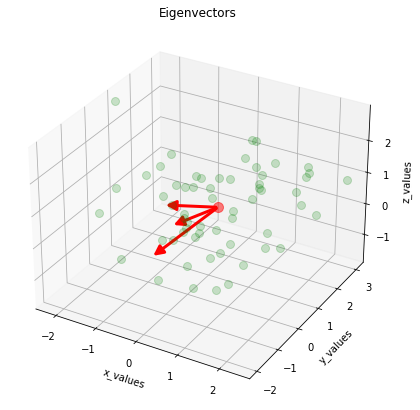

In [21]:
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(sample[0,:], sample[1,:], sample[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

    6. Sort the eigenvectors by descreasing eigenvalues. 

    The idea is that since the eigenvectors will form the axes of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information about the distribution of the data. 

In [22]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
sorted(eig_pairs)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

639.4418425198182
1.3593893967146204e-14
1.8023401905196065e-30


   7. Choose *k* eigenvectors with the largest eigenvalues.

    We are going to reduce a 3-D feature space to a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to construct our $d\times k$-D eigenvector matrix $\bf{W}$.

In [23]:
a=np.array(eig_pairs[:2][0][1])
b=np.array(eig_pairs[:2][1][1])
matrix_w = np.vstack((a,b))
#matrix_w = np.array((eig_pairs[:2][0][1], eig_pairs[:2][1][1]))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.57735027 -0.57735027 -0.57735027]
 [-0.81617636  0.42788995  0.38828642]]


    8. Transform the samples onto the new subspace. 

    The new subspace equation is 

$${\bf y}={\bf W}^T\times {\bf x}$$

In [24]:
transformed = matrix_w.dot(sample)
assert transformed.shape == (2,60), "The matrix is not 2x60 dimensional."

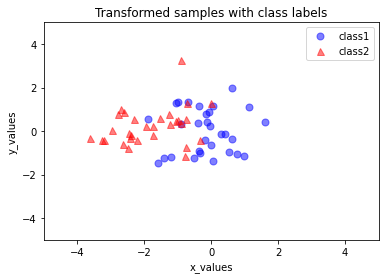

In [25]:
plt.plot(transformed[0,0:30], transformed[1,0:30], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,30:60], transformed[1,30:60], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

3-c. Using `PCA` from sklearn, make a visualization comparison with the result in 3-b and evaluation your impletemented PCA. [5 pts]

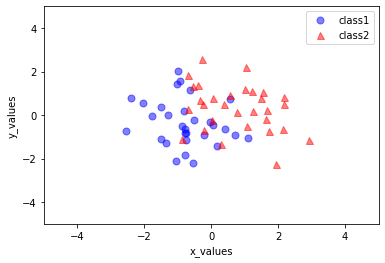

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pcad = pca.fit_transform(sample.T)
tempx=[pcad[0:30][:, 0],pcad[30:60][:, 0]]
tempy=[pcad[0:30][:, 1],pcad[30:60][:, 1]]

plt.plot(tempx[0], tempy[0], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(tempx[1], tempy[1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()